In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import timedelta
#import plotly.graph_objs as go
#from plotly.offline import init_notebook_mode,iplot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df1 = pd.read_excel("Yr_2009_10.xlsx")
df1.shape

(525461, 8)

In [4]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df1['InvoiceDate'].max(),df1['InvoiceDate'].min()

(Timestamp('2010-12-09 20:01:00'), Timestamp('2009-12-01 07:45:00'))

### df1 data includes transactions from 01-Dec-2009 to 9-Dec-2010

In [6]:
df2 = pd.read_excel("Yr_2010_11.xlsx")
df2.shape

(541910, 8)

In [7]:
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df2['InvoiceDate'].max(),df2['InvoiceDate'].min()

(Timestamp('2011-12-09 12:50:00'), Timestamp('2010-12-01 08:26:00'))

### df2 data includes transactions from 01-Dec-2010 to 9-Dec-2011

In [9]:
df = pd.concat([df1,df2])
df.shape

(1067371, 8)

In [10]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [11]:
print('Number of duplicated records: ', df.duplicated(keep='first').sum())

Number of duplicated records:  34335


In [12]:
indx = df[df.duplicated(keep='first')].index
df.drop(index = indx, inplace= True)
df.shape

(999444, 8)

df.info()

In [13]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


# Exploring the content of variables

### This dataframe contains 8 variables that correspond to:

Invoice: Invoice number (Nominal), a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code (Nominal), a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name (Nominal)

Quantity: The quantities of each product (item) per transaction (Numeric)

InvoiceDate: Invoice Date and time (Numeric), the day and time when each transaction was generated.

Price: Unit price (Numeric), Product price per unit in sterling.

CustomerID: Customer number (Nominal), a 5-digit integral number uniquely assigned to each customer.

Country: Country name (Nominal), the name of the country where each customer resides.

## Data Preprocessing


### Identifying missing values

In [14]:
 #Identify the number of NAs in each feature and select only those having NAs
total_NA = df.isnull().sum()[df.isnull().sum() != 0]

# Calculate the percentage of NA in each feature
percent_NA = total_NA/df.shape[0]

# Summarize our findings in a dataframe
missing = pd.concat([total_NA, percent_NA], axis=1, keys=['Total NAs', 'Percentage']).sort_values('Total NAs', ascending=False)
missing

,Total NAs,Percentage
Customer ID,226821,0.226947
Description,4176,0.004178


In [0]:
# Drop transactions with missing Customer ID
df.dropna(axis=0, subset=['Customer ID'], inplace= True)

In [16]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [17]:
df.shape

(772623, 8)

In [0]:
df[['StockCode']] = df['StockCode'].astype(str)
df[['Customer ID']] = df['Customer ID'].astype(int).astype(str)
df[['Invoice']] = df['Invoice'].astype(str)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772623 entries, 22769 to 541909
Data columns (total 8 columns):
Invoice        772623 non-null object
StockCode      772623 non-null object
Description    772623 non-null object
Quantity       772623 non-null int64
InvoiceDate    772623 non-null datetime64[ns]
Price          772623 non-null float64
Customer ID    772623 non-null object
Country        772623 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 53.1+ MB


In [20]:
indx1 = df.Invoice[df.Invoice.str.contains('C') == True].index
print('Number of orders cancelled: {}/{} ({:.2f}%) '.format(len(indx1),df.shape[0],len(indx1)/df.shape[0]*100))

Number of orders cancelled: 17657/772623 (2.29%) 


In [21]:
# Drop cancelled transactions
df.drop(index= indx1, inplace= True)
df.shape

(741725, 8)

In [22]:
df.describe()

,Quantity,Price
count,741725.000000,741725.000000
mean,13.544388,3.213633
std,149.474327,29.964049
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,10953.500000


In [0]:
# Revenue per transaction which is the product of sale price and quantity
df['Revenue'] = df['Price'] * df['Quantity']

In [24]:
df[df.Revenue == 0].shape

(64, 9)

In [67]:
# Drop transactions with zero Revenue
indx2 = df.loc[df.Revenue == 0].index
df_new = df.drop(index= indx2)
df_new.shape
df_new.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680,France,18.00


In [26]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,741608.0,13.525852,148.774012,1.000,2.00,6.00,12.00,80995.0
Price,741608.0,3.210246,29.793673,0.001,1.25,1.95,3.75,10953.5
Revenue,741608.0,22.272111,232.468327,0.001,4.95,12.48,19.80,168469.6


In [27]:
# Summary statistics of categorical variables
df_new.select_dtypes(include='object').describe().T

,count,unique,top,freq
Invoice,741608,35983,580727,529
StockCode,741608,4584,85123A,4743
Description,741608,5225,WHITE HANGING HEART T-LIGHT HOLDER,4736
Customer ID,741608,5821,17841,11906
Country,741608,41,United Kingdom,665598


In [0]:
#df_new.to_excel("Combined_cleaned_data_2009-12.xlsx")

In [29]:
# Grouping by Country
country_df = df_new.groupby(['Country']).agg({
        'Customer ID': 'count',
        'Invoice': 'nunique',
        'Revenue': 'sum'})
# Rename the columns 
country_df.rename(columns={'Customer ID': 'Number_of_customers',
                         'Invoice': 'Number_of_transactions',
                         'Revenue': 'Total_Sales'}, inplace=True)
country_df.sort_values('Total_Sales',ascending=False,inplace=True)
country_df.head()

,Number_of_customers,Number_of_transactions,Total_Sales
Country,,,
United Kingdom,665598,32618,1.364734e+07
EIRE,15006,557,5.943787e+05
Netherlands,4838,223,5.308057e+05
Germany,15818,776,4.066542e+05
France,12979,604,3.351722e+05


In [0]:
country_df['Avg_sales_per_customer'] = country_df['Total_Sales'] / country_df['Number_of_customers']

In [31]:
country_df.head()

,Number_of_customers,Number_of_transactions,Total_Sales,Avg_sales_per_customer
Country,,,,
United Kingdom,665598,32618,1.364734e+07,20.503877
EIRE,15006,557,5.943787e+05,39.609406
Netherlands,4838,223,5.308057e+05,109.715945
Germany,15818,776,4.066542e+05,25.708322
France,12979,604,3.351722e+05,25.824194


Text(0.5, 0, 'Country')

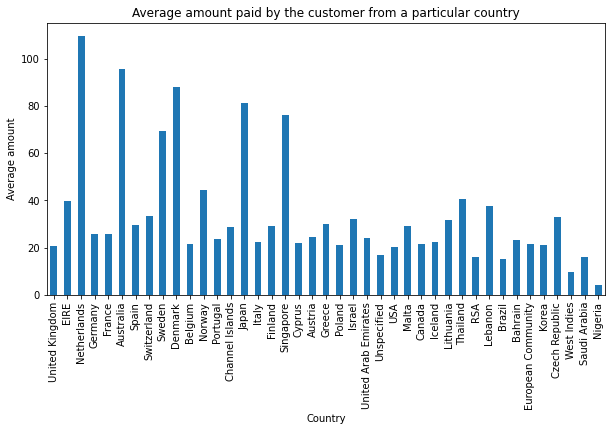

In [32]:
country_df['Avg_sales_per_customer'].plot(kind='bar',figsize=(10,5),title='Average amount paid by the customer from a particular country')
plt.ylabel('Average amount')
plt.xlabel('Country')

In [0]:
modifed_df = df_new[['Invoice','Revenue','InvoiceDate','Country']].copy()
modifed_df['Month'] = modifed_df['InvoiceDate'].dt.month 
modifed_df['Year'] = modifed_df['InvoiceDate'].dt.year 

In [34]:
date_df = modifed_df.groupby(['Year','Month']).agg({'Invoice': 'nunique',
        'Revenue': 'sum'})
date_df

Invoice      Revenue
Year Month                      
2009 12         713   320365.410
2010 1          996   534987.482
     2         1103   495820.416
     3         1516   678351.181
     4         1320   577520.182
     5         1374   582579.060
     6         1493   623379.060
     7         1373   571516.290
     8         1288   589400.260
     9         1684   808769.391
     10        2115  1001059.160
     11        2575  1129828.142
     12        1390   546518.530
2011 1          980   551577.570
     2          997   431476.370
     3         1315   576324.020
     4         1141   456309.501
     5         1544   654958.900
     6         1383   635463.390
     7         1324   581157.261
     8         1271   625450.830
     9         1747   923597.781
     10        1918   986951.730
     11        2646  1119346.170
     12         777   514467.350

In [0]:
month_df = modifed_df.groupby(['Month']).agg({'Revenue': 'sum'})


Text(0.5, 0, 'Month')

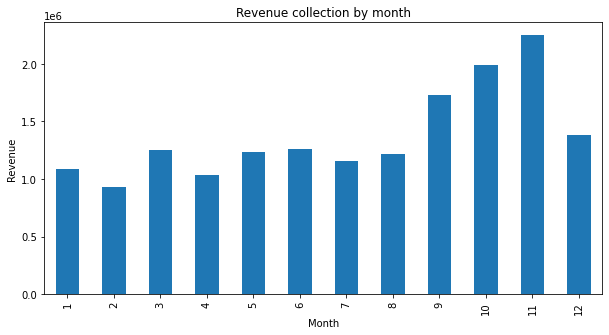

In [36]:
month_df['Revenue'].plot(kind='bar',figsize=(10,5),title='Revenue collection by month')
plt.ylabel('Revenue')
plt.xlabel('Month')

## Calculation for R, F and M values for customer segmentation

#### R (Recency): Number of days since last purchase
#### F (Frequency): Number of transactions (or invoices generated)
#### M (Monetary): Total amount of transactions (revenue contributed)


In [37]:
new_df = df_new.reset_index()
new_df.head()

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,22773,491158,21485,RED SPOT HEART HOT WATER BOTTLE,1,2009-12-10 10:17:00,4.95,15523,United Kingdom,4.95
1,22774,491158,22109,FULL ENGLISH BREAKFAST PLATE,1,2009-12-10 10:17:00,3.75,15523,United Kingdom,3.75
2,22775,491158,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2009-12-10 10:17:00,2.95,15523,United Kingdom,2.95
3,22776,491158,21212,PACK OF 72 RETRO SPOT CAKE CASES,48,2009-12-10 10:17:00,0.55,15523,United Kingdom,26.40
4,22777,491158,20753,RETRO PINK SPOT WASHING UP GLOVES,1,2009-12-10 10:17:00,2.10,15523,United Kingdom,2.10


In [38]:
new_df.drop(columns=['index'],axis=1,inplace=True)
new_df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
741603,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
741604,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
741605,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
741606,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85
741607,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680,France,18.00


In [39]:
# Compute the maximum date to know the latest transaction date

max_date = max(new_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [40]:
# Compute the difference between max date and transaction date

new_df['Difference'] = max_date - new_df['InvoiceDate']

new_df['Difference'] = new_df['Difference'].dt.days
new_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Difference
0,491158,21485,RED SPOT HEART HOT WATER BOTTLE,1,2009-12-10 10:17:00,4.95,15523,United Kingdom,4.95,729
1,491158,22109,FULL ENGLISH BREAKFAST PLATE,1,2009-12-10 10:17:00,3.75,15523,United Kingdom,3.75,729
2,491158,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2009-12-10 10:17:00,2.95,15523,United Kingdom,2.95,729
3,491158,21212,PACK OF 72 RETRO SPOT CAKE CASES,48,2009-12-10 10:17:00,0.55,15523,United Kingdom,26.40,729
4,491158,20753,RETRO PINK SPOT WASHING UP GLOVES,1,2009-12-10 10:17:00,2.10,15523,United Kingdom,2.10,729


In [41]:
r = new_df.groupby('Customer ID')['Difference'].min()
r = r.reset_index()
r.rename(columns= {'Difference':'Recency'}, inplace=True)
print(r.shape)
r.head()


(5821, 2)


,Customer ID,Recency
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309


In [42]:
f_m = new_df.groupby(['Customer ID']).agg({'Invoice': 'nunique','Revenue': 'sum'})
f_m.rename(columns={'Invoice': 'Frequency',
                         'Revenue': 'MonetaryValue'}, inplace=True)
f_m = f_m.reset_index()
print(f_m.shape)
f_m.head()

(5821, 3)


,Customer ID,Frequency,MonetaryValue
0,12346,12,77556.46
1,12347,8,4746.73
2,12348,5,1979.40
3,12349,4,4281.46
4,12350,1,291.80


In [43]:
# Merging the two dataframes

rfm = pd.merge(r,f_m, on='Customer ID', how='inner')
rfm.head()

,Customer ID,Recency,Frequency,MonetaryValue
0,12346,325,12,77556.46
1,12347,1,8,4746.73
2,12348,74,5,1979.40
3,12349,18,4,4281.46
4,12350,309,1,291.80


In [44]:
rfm.shape

(5821, 4)

In [45]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,5821.0,195.907061,204.419981,0.00,24.00,92.00,375.00,729.00
Frequency,5821.0,6.181584,12.729846,1.00,1.00,3.00,7.00,393.00
MonetaryValue,5821.0,2837.515107,13762.678184,2.95,331.66,838.84,2176.01,534129.68


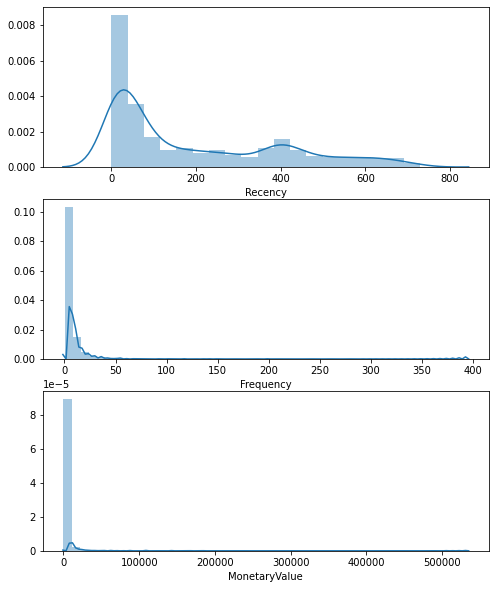

In [46]:
# Plot RFM distributions
plt.figure(figsize=(8,10))

# Plot distribution of R
plt.subplot(3, 1, 1);

sns.distplot(rfm['Recency'])

# Plot distribution of F
plt.subplot(3, 1, 2); 

sns.distplot(rfm['Frequency'])

# Plot distribution of M
plt.subplot(3, 1, 3);

sns.distplot(rfm['MonetaryValue'])

# Show the plot
plt.show()

In [47]:
# Rescaling the attributes using Standardisation

rfm_std = rfm[['Recency','Frequency','MonetaryValue']]

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(rfm_std)

rfm_scaled = scaler.transform(rfm_std)
rfm_scaled.shape

(5821, 3)

In [48]:
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['Recency','Frequency','MonetaryValue']
rfm_scaled.head()

,Recency,Frequency,MonetaryValue
0,0.631563,0.457108,5.429566
1,-0.953546,0.142859,0.138736
2,-0.596407,-0.092828,-0.062356
3,-0.870376,-0.171390,0.104926
4,0.553286,-0.407077,-0.184988


In [49]:
rfm_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,5821.0,4.857822e-17,1.000086,-0.958438,-0.841023,-0.508346,0.876178,2.608056
Frequency,5821.0,1.549658e-19,1.000086,-0.407077,-0.407077,-0.249953,0.064297,30.389342
MonetaryValue,5821.0,1.005609e-17,1.000086,-0.205978,-0.182092,-0.145237,-0.048069,38.607152


In [0]:
#rfm_scaled.to_excel("rfm_standardized_values.xlsx")


### Finding the Optimal Number of Clusters
#### Elbow Curve to get the right number of Clusters

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.


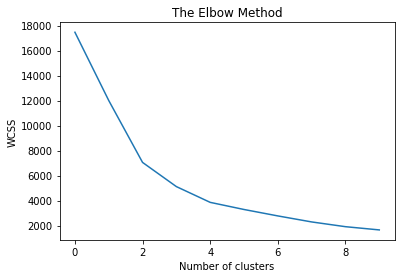

In [51]:
from sklearn.cluster import KMeans 

# within cluster sum of sqares - WCSS (inertia)
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Silhouette Analysis

silhouette score = (p−q) / max(p,q)

p is the mean distance to the points in the nearest cluster that the data point is not a part of
q is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,
A score closer to -1 indicates that the data point is not similar to the data points in its cluster.


In [52]:
from sklearn.metrics import silhouette_score

# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(rfm_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.9159946602501814
For n_clusters=3, the silhouette score is 0.5850906454691305
For n_clusters=4, the silhouette score is 0.5934203179486363
For n_clusters=5, the silhouette score is 0.6014260495575601
For n_clusters=6, the silhouette score is 0.5475742201431545
For n_clusters=7, the silhouette score is 0.5478590858095091
For n_clusters=8, the silhouette score is 0.5484903038729697


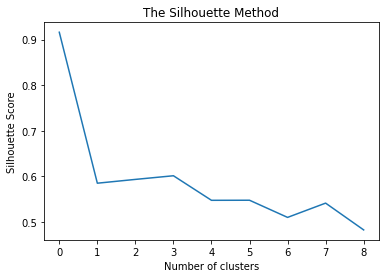

In [68]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(rfm_scaled)
  labels = kmeans.labels_
  sil.append(silhouette_score(rfm_scaled, labels, metric = 'euclidean'))

plt.plot(sil)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [53]:
# Final model with k=3
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(rfm_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [54]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,Customer ID,Recency,Frequency,MonetaryValue,Cluster_Id
0,12346,325,12,77556.46,0
1,12347,1,8,4746.73,0
2,12348,74,5,1979.40,0
3,12349,18,4,4281.46,0
4,12350,309,1,291.80,1


In [55]:
rfm_cluster = rfm.groupby('Cluster_Id').agg({'Recency': ['max','mean', 'min'], 'Frequency': ['max','mean','min'],'MonetaryValue': ['max','mean','min'],'Customer ID' : 'count'})

rfm_cluster

Recency                   ...  MonetaryValue           Customer ID
               max        mean  min  ...           mean       min       count
Cluster_Id                           ...                                     
0              371   64.278199    0  ...    3002.236371      6.20        3821
1              729  452.114257  245  ...     719.627256      2.95        1978
2              371   22.090909    0  ...  164645.797727  28386.15          22

[3 rows x 10 columns]

In [0]:
rfm_cluster.to_excel("rfm_cluster_summary.xlsx")

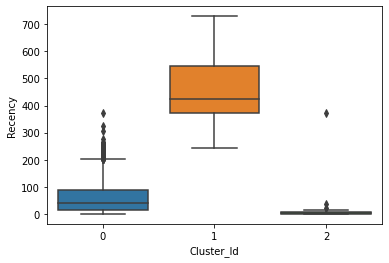

In [57]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)


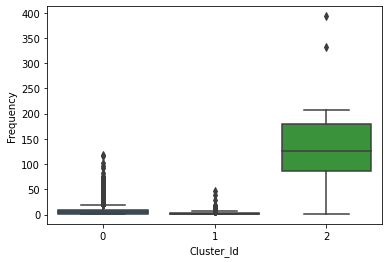

In [58]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

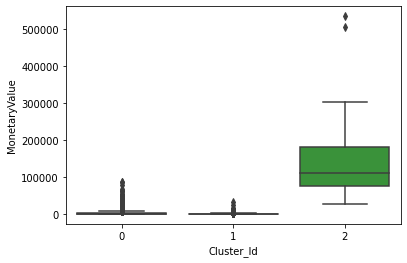

In [59]:
# Box plot to visualize Cluster Id vs MonetaryValue

sns.boxplot(x='Cluster_Id', y='MonetaryValue', data=rfm)

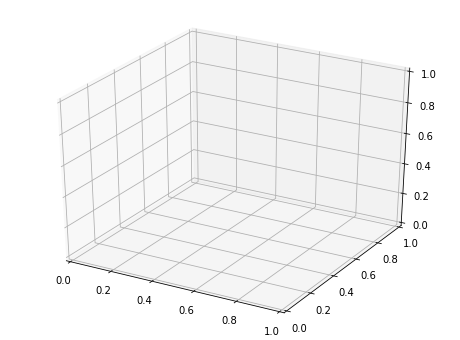

In [60]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection="3d")

plt.show()

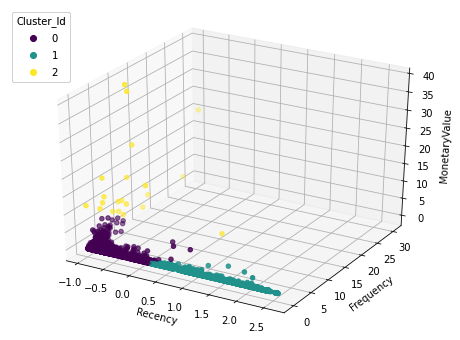

In [61]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection="3d")


x_points = rfm_scaled['Recency'].to_numpy(dtype='float')
y_points = rfm_scaled['Frequency'].to_numpy(dtype='float')
z_points = rfm_scaled['MonetaryValue'].to_numpy(dtype='float')
y = rfm['Cluster_Id'].to_numpy(dtype='float')
scatter = ax.scatter3D(x_points, y_points, z_points, c=y)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MonetaryValue')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Cluster_Id")
ax.add_artist(legend1)

plt.show()



In [0]:

# Define rfm_level function
def rfm_level(df):
    if df['Cluster_Id'] == 1:
        return 'Likely to churn'
    elif df['Cluster_Id'] == 0:
        return 'Loyal or Potential'
    else:
        return 'Can\'t Loose Them'





In [63]:
# Create a new column Customer_type 
rfm['Customer_type'] = rfm.apply(rfm_level, axis=1)

rfm.head()

,Customer ID,Recency,Frequency,MonetaryValue,Cluster_Id,Customer_type
0,12346,325,12,77556.46,0,Loyal or Potential
1,12347,1,8,4746.73,0,Loyal or Potential
2,12348,74,5,1979.40,0,Loyal or Potential
3,12349,18,4,4281.46,0,Loyal or Potential
4,12350,309,1,291.80,1,Likely to churn


In [64]:
rfm.shape

(5821, 6)

In [65]:
rfm.Customer_type.value_counts()

Loyal or Potential    3821
Likely to churn       1978
Can't Loose Them        22
Name: Customer_type, dtype: int64

In [0]:
rfm.to_excel("RFM_groupby_customerId.xlsx")